In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset to check dataset specification
df = pd.read_csv('/content/drive/MyDrive/Superstore_Dataset_Project/SuperStoreOrders.csv') # note: you will have to change the path of dataset while running this code thanks
print(df.shape)
df.info()

In [ ]:
df.head(200) # just to see the dataset details

In [ ]:
# CLEANING THE DATASET FOR BETTER ANALYSIS

In [ ]:
# remove the null values from the dataset
df.isnull().sum()
df['shipping_cost'].fillna(df['shipping_cost'].mean(), inplace=True)

In [ ]:
# drop all the duplicate values from the dataset to maintain the accuracy
df.drop_duplicates(inplace=True)
df.head(200)

In [ ]:
df['order_date'] = df['order_date'].str.replace('-', '/')
df['ship_date'] = df['ship_date'].str.replace('-', '/')

df.head(200)

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y', errors='coerce') # Changed the format to '%m/%d/%Y' to match the data and added errors='coerce' to handle potential errors
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d/%m/%Y', errors='coerce') # Changed the format to '%m/%d/%Y' to match the data and added errors='coerce' to handle potential errors
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days
df.head(200)

In [ ]:
# Check for NaT in the 'order_date' column
print(df['order_date'].isna().sum())  # Shows how many NaT values in order_date

# Check for NaT in the 'ship_date' column
print(df['ship_date'].isna().sum())  # Shows how many NaT values in ship_date

In [9]:
# simple feature engineering on date to find the seasonal data
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year
df['order_day']=df['order_date'].dt.day

In [ ]:
# Corrigindo coluna 'sales' de object para float
df['sales'] = df['sales'].replace({',': ''}, regex=True).astype(float)
df['is_profitable'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)
df.head()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['segment_encoded'] = le.fit_transform(df['segment'])
df['order_priority_encoded'] = le.fit_transform(df['order_priority'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['sales', 'profit', 'shipping_cost']] = scaler.fit_transform(df[['sales', 'profit', 'shipping_cost']])

In [ ]:
df.head(500)

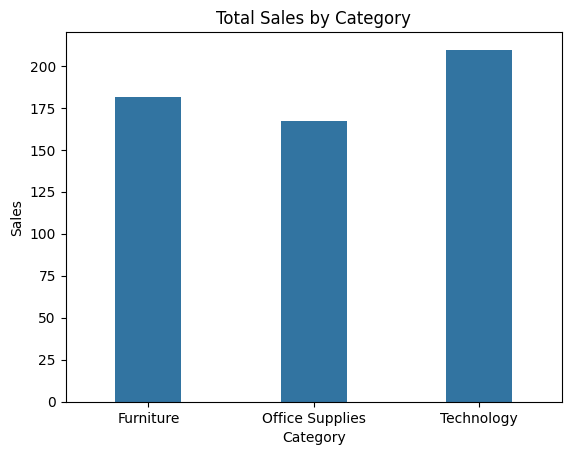

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

category_sales = df.groupby('category')['sales'].sum().reset_index()
sns.barplot(data=category_sales, x='category', y='sales',  width=0.4)
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

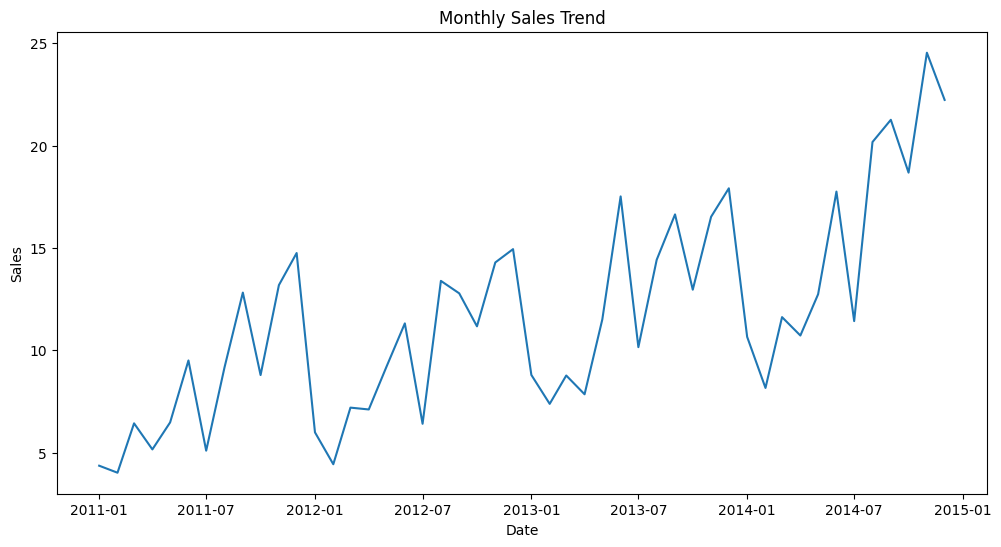

In [14]:
monthly_sales = df.groupby(['order_year', 'order_month'])['sales'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales['order_year'].astype(str) + '-' + monthly_sales['order_month'].astype(str) + '-01')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='date', y='sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

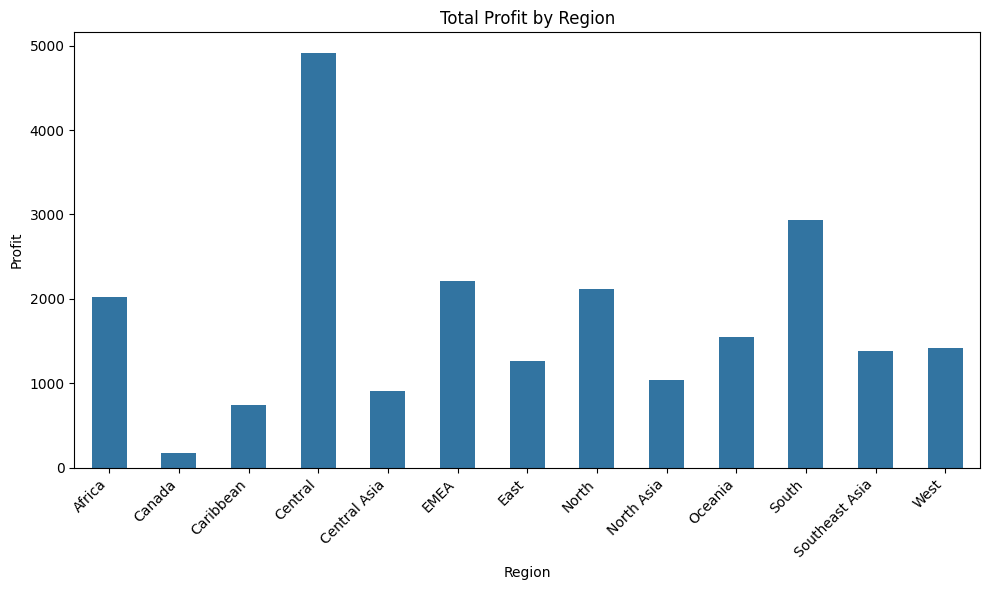

In [15]:
# Group and plot
region_profit = df.groupby('region')['profit'].sum().reset_index()

# Set larger figure size
plt.figure(figsize=(10, 6))

# Barplot with rotated x-axis labels
sns.barplot(data=region_profit, x='region', y='profit', width=0.5)

plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()  # Prevent clipping
plt.show()


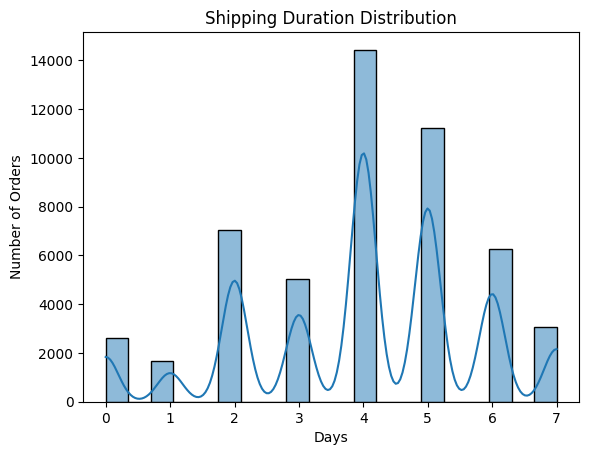

In [16]:
sns.histplot(df['shipping_duration'], bins=20, kde=True)
plt.title('Shipping Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.show()

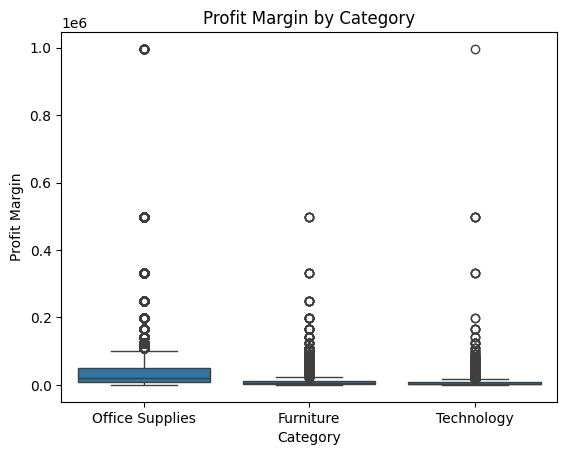

In [17]:
df['profit_margin'] = (df['profit'] / df['sales']) * 100
sns.boxplot(data=df, x='category', y='profit_margin')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.show()

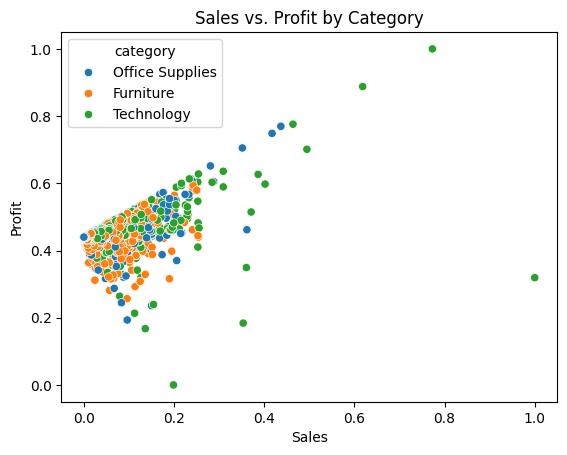

In [18]:
sns.scatterplot(data=df, x='sales', y='profit', hue='category')
plt.title('Sales vs. Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

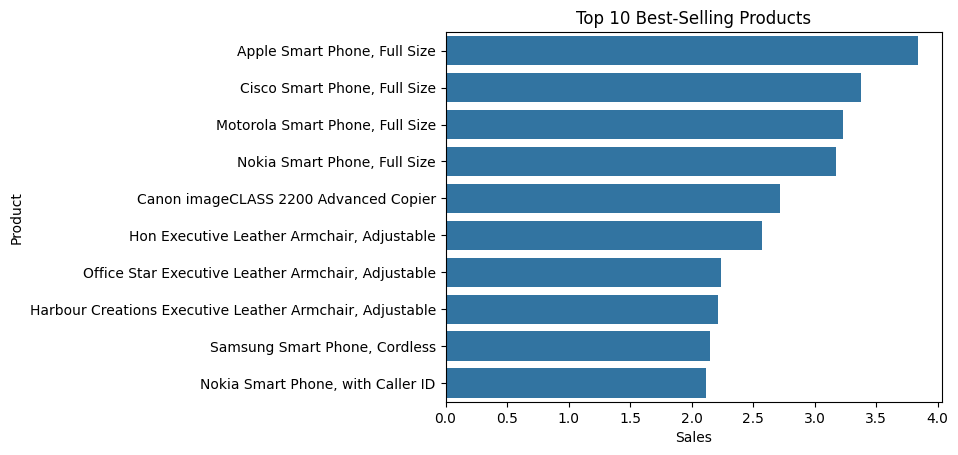

In [19]:
top_products = df.groupby('product_name')['sales'].sum().nlargest(10).reset_index()
sns.barplot(data=top_products, x='sales', y='product_name')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

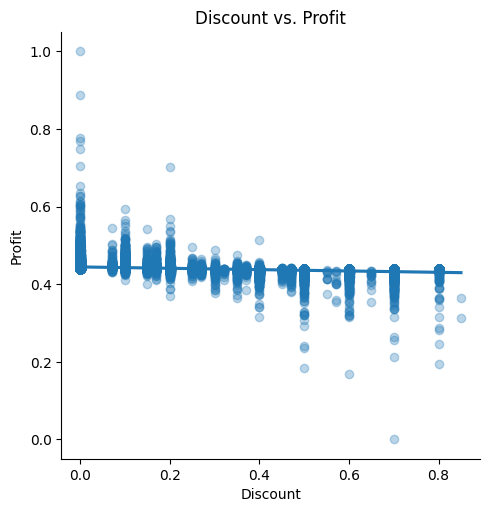

In [20]:
sns.lmplot(data=df, x='discount', y='profit', scatter_kws={'alpha':0.3})
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

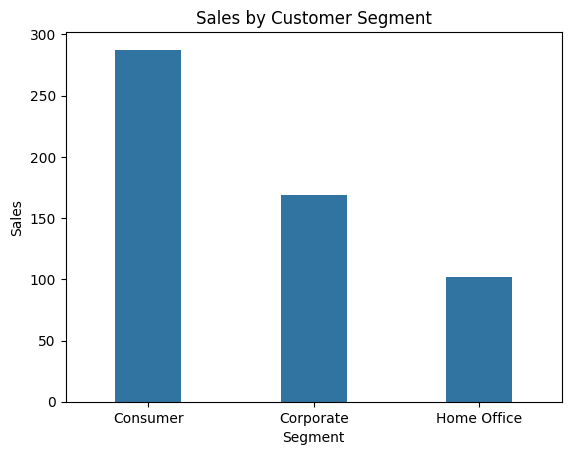

In [21]:
segment_sales = df.groupby('segment')['sales'].sum().reset_index()
sns.barplot(data=segment_sales, x='segment', y='sales', width = 0.4)
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

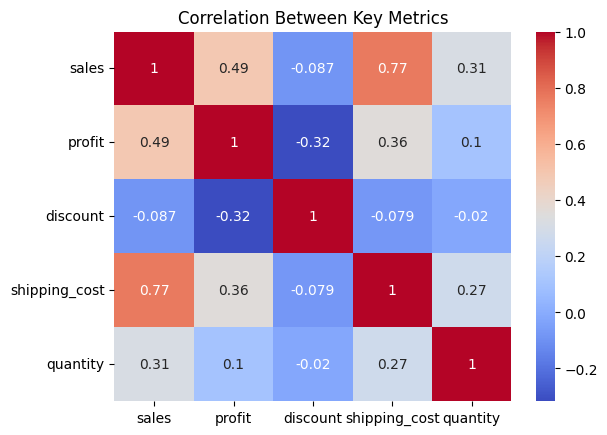

In [22]:
sns.heatmap(df[['sales', 'profit', 'discount', 'shipping_cost', 'quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Metrics')
plt.show()

In [ ]:
df.info()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
features = ['sales', 'quantity', 'discount', 'shipping_cost', 'segment_encoded', 'order_priority_encoded']
X = df[features]
y = df['is_profitable']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3958
           1       0.92      0.97      0.95     11429

    accuracy                           0.92     15387
   macro avg       0.91      0.86      0.88     15387
weighted avg       0.92      0.92      0.91     15387

Accuracy (Logistic Regression): 0.9168778839279912


In [27]:
# Model 2: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3958
           1       0.92      0.91      0.91     11429

    accuracy                           0.87     15387
   macro avg       0.83      0.84      0.83     15387
weighted avg       0.87      0.87      0.87     15387

Accuracy (Decision Tree): 0.870865015922532


In [28]:
# Model 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      3958
           1       0.92      0.96      0.94     11429

    accuracy                           0.91     15387
   macro avg       0.89      0.86      0.88     15387
weighted avg       0.91      0.91      0.91     15387

Accuracy (Random Forest): 0.9098589718593618


In [29]:
# Model 4: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (K-Nearest Neighbors): {accuracy_knn}")

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.81      3958
           1       0.92      0.96      0.94     11429

    accuracy                           0.91     15387
   macro avg       0.89      0.86      0.87     15387
weighted avg       0.90      0.91      0.90     15387

Accuracy (K-Nearest Neighbors): 0.9061545460453629


In [30]:
# Final evaluation: Compare all models
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")


Model Accuracy Comparison:
Logistic Regression Accuracy: 0.9168778839279912
Decision Tree Accuracy: 0.870865015922532
Random Forest Accuracy: 0.9098589718593618
K-Nearest Neighbors Accuracy: 0.9061545460453629


In [31]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirror.digitalpacific.com.au/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

tar: spark-3.1.2-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [32]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SuperstoreBigData") \
    .getOrCreate()


In [33]:
df = spark.read.csv('/content/drive/MyDrive/Superstore_Dataset_Project/SuperStoreOrders.csv', header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- order_id: string (nullable = true)
 |-- order_date: string (nullable = true)
 |-- ship_date: string (nullable = true)
 |-- ship_mode: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- segment: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market: string (nullable = true)
 |-- region: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales: string (nullable = true)
 |-- quantity: string (nullable = true)
 |-- discount: string (nullable = true)
 |-- profit: double (nullable = true)
 |-- shipping_cost: double (nullable = true)
 |-- order_priority: string (nullable = true)
 |-- year: string (nullable = true)

+---------------+----------+---------+--------------+---------------+-----------+---------------+---------+------+-------+----------------+---

In [34]:
df.select("Category", "Sales", "Profit").filter(df["Profit"] > 0).show()


+---------------+-----+-------+
|       Category|Sales| Profit|
+---------------+-----+-------+
|Office Supplies|  408| 106.14|
|Office Supplies|  120| 36.036|
|Office Supplies|   66|  29.64|
|      Furniture|  114|  37.77|
|Office Supplies|   55| 15.342|
|     Technology|  314|   3.12|
|Office Supplies|  276|110.412|
|      Furniture|  667| 253.32|
|      Furniture|  854| 290.43|
|     Technology|  193|  50.13|
|     Technology|  195|  44.88|
|Office Supplies|  123|   42.9|
|     Technology|   69|   3.42|
|Office Supplies|   36|  4.743|
|Office Supplies|   52|   7.77|
|Office Supplies|   62|    8.7|
|Office Supplies|   81|  26.76|
|Office Supplies|   47|  17.07|
|Office Supplies|    6|  0.546|
|Office Supplies|   17|   4.17|
+---------------+-----+-------+
only showing top 20 rows



In [35]:
df.groupBy("Region").agg({"Profit": "sum", "Sales": "sum"}).show()


+--------------+----------+------------------+
|        Region|sum(Sales)|       sum(Profit)|
+--------------+----------+------------------+
|        Africa|  538115.0| 88871.63100000001|
|    North Asia|  453686.0|165578.42100000012|
|  Central Asia|  389506.0|132480.18700000003|
|         South| 1028363.0|140256.02488000033|
|     Caribbean|  251441.0| 34571.32104000002|
|       Central| 1803196.0|311848.12214000063|
|          East|  360986.0| 91603.31270000001|
|       Oceania|  625382.0|121666.64200000012|
|        Canada|   50314.0|17817.389999999992|
|          West|  412187.0|107301.84950000013|
|          EMEA|  575562.0| 43897.97099999996|
|Southeast Asia|  532172.0|17852.329000000034|
|         North|  790546.0|194597.95251999993|
+--------------+----------+------------------+



In [36]:
from pyspark.sql.functions import datediff, to_date
df = df.withColumn("ShippingDuration", datediff(to_date("ship_date"), to_date("order_date")))

In [37]:
df.orderBy("Sales", ascending=False).show(10)

+---------------+----------+----------+--------------+-----------------+---------+----------+--------------+------+------------+----------------+---------------+------------+--------------------+-----+--------+--------+--------+-------------+--------------+----+----------------+
|       order_id|order_date| ship_date|     ship_mode|    customer_name|  segment|     state|       country|market|      region|      product_id|       category|sub_category|        product_name|sales|quantity|discount|  profit|shipping_cost|order_priority|year|ShippingDuration|
+---------------+----------+----------+--------------+-----------------+---------+----------+--------------+------+------------+----------------+---------------+------------+--------------------+-----+--------+--------+--------+-------------+--------------+----+----------------+
| MX-2014-165260|28-06-2014|  4/7/2014|Standard Class|    Bruce Stewart| Consumer| Guatemala|     Guatemala| LATAM|     Central| OFF-AP-10002425|Office Supplies